In [ ]:
# ==============================================================================
# CÉLULA 1: Importação das Bibliotecas
# Execute esta célula primeiro para carregar todas as ferramentas necessárias.
# ==============================================================================

import pandas as pd                 # Para manipulação de dados em tabelas (DataFrames)
import matplotlib.pyplot as plt     # Para a criação de gráficos e visualizações
import numpy as np                  # Para operações numéricas de alta performance
import networkx as nx               # A biblioteca principal para teoria dos grafos
import os                           # Para interagir com o sistema de arquivos
import glob                         # Para encontrar arquivos em diretórios

print("Bibliotecas importadas com sucesso!")

In [ ]:
# ==============================================================================
# CÉLULA 2: Definição das Funções Principais
# Execute esta célula para "ensinar" ao programa as nossas lógicas de
# processamento e visualização. Nenhuma saída será exibida ainda.
# ==============================================================================

def processar_matriz_com_prim(dataframe_adjacencia):
    """
    Recebe uma matriz de adjacência, constrói um grafo e encontra a MST.
    """
    # 1. Preparação da Matriz de Adjacência
    matriz = dataframe_adjacencia.drop(columns=dataframe_adjacencia.columns[0])
    matriz.columns = matriz.columns.astype(int)
    matriz.index = range(1, len(matriz) + 1)

    # 2. Criação de um novo grafo não direcionado
    G = nx.Graph()

    # 3. Preenchimento do grafo com as arestas e pesos da matriz
    for linha in matriz.index:
        for coluna in matriz.columns:
            if linha < coluna:
                peso = matriz.at[linha, coluna]
                if pd.notna(peso) and peso > 0:
                    G.add_edge(linha, coluna, weight=float(peso))

    # 4. Aplicação do Algoritmo de Prim para encontrar a MST
    mst = nx.minimum_spanning_tree(G, algorithm='prim')

    # 5. Cálculo do custo total da MST
    pesos_mst = nx.get_edge_attributes(mst, 'weight')
    custo_total = sum(pesos_mst.values())

    # 6. Retorno dos resultados
    return G, mst, custo_total


def visualizar_comparacao_mst(grafo_original, mst, nome_arquivo, custo_total):
    """
    Cria e exibe uma figura com dois subplots: o grafo original e sua MST.
    """
    # --- Configurações de Estilo ---
    cor_node_original = 'lightblue'
    cor_aresta_original = 'gray'
    cor_node_mst = 'lightgreen'
    cor_aresta_mst = 'red'
    tamanho_fonte = 8
    
    # 1. Preparação da figura e do layout dos nós
    num_nos = len(grafo_original.nodes())
    plt.figure(figsize=(max(12, num_nos // 2), 6))
    pos = nx.spring_layout(grafo_original, seed=42)

    # 2. Plot do Grafo Original (à esquerda)
    plt.subplot(1, 2, 1)
    nx.draw(grafo_original, pos, with_labels=True, 
            node_color=cor_node_original, edge_color=cor_aresta_original, 
            font_size=tamanho_fonte)
    plt.title("Grafo Original Completo")

    # 3. Plot da Árvore Geradora Mínima (à direita)
    plt.subplot(1, 2, 2)
    nx.draw(mst, pos, with_labels=True, 
            node_color=cor_node_mst, edge_color=cor_aresta_mst, 
            font_size=tamanho_fonte)
    edge_labels = nx.get_edge_attributes(mst, 'weight')
    nx.draw_networkx_edge_labels(mst, pos, edge_labels=edge_labels, font_size=tamanho_fonte-1)
    plt.title(f"Árvore Geradora Mínima (Custo: {custo_total:.2f})")

    # 4. Título geral e finalização
    plt.suptitle(f"Análise do Arquivo: {nome_arquivo}", fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

print("Funções 'processar_matriz_com_prim' e 'visualizar_comparacao_mst' definidas com sucesso!")

4 arquivos encontrados.



Processando: S002R03_data.xlsx
Custo total da Árvore Geradora Mínima: -3633000000.00


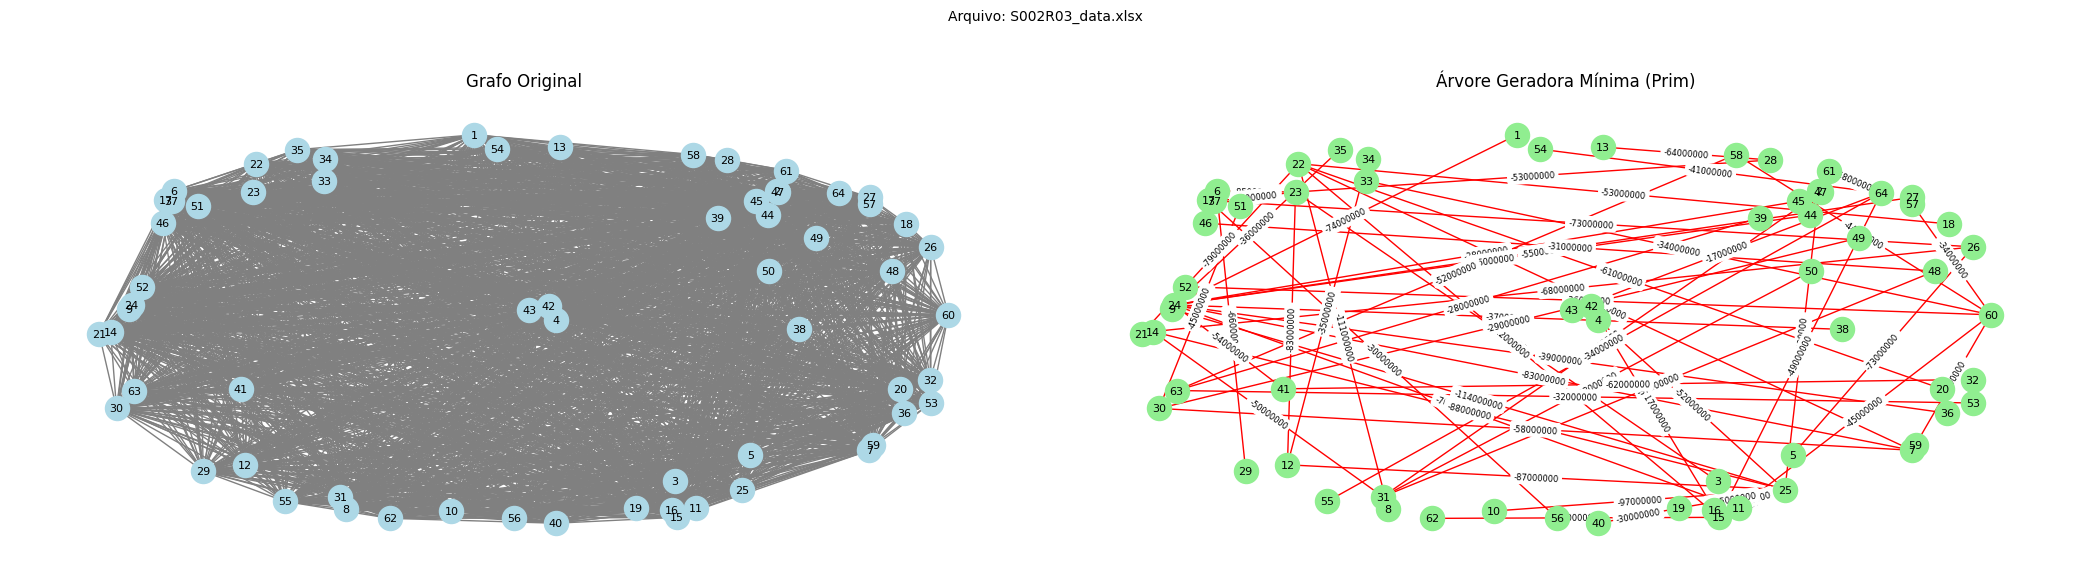


Processando: S002R04_data.xlsx
Custo total da Árvore Geradora Mínima: -2624000000.00


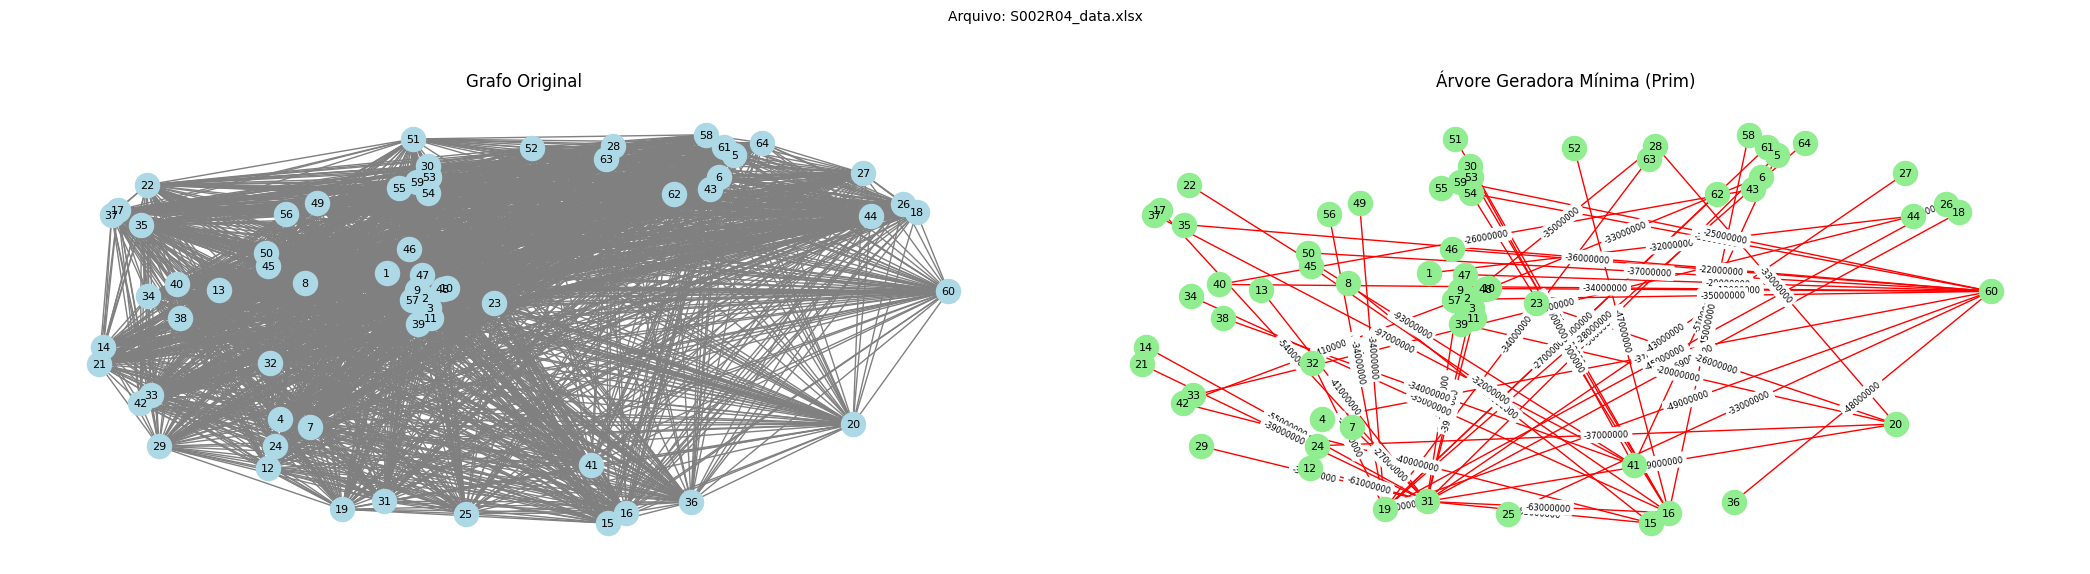


Processando: S002R05_data.xlsx
Custo total da Árvore Geradora Mínima: -3655000000.00


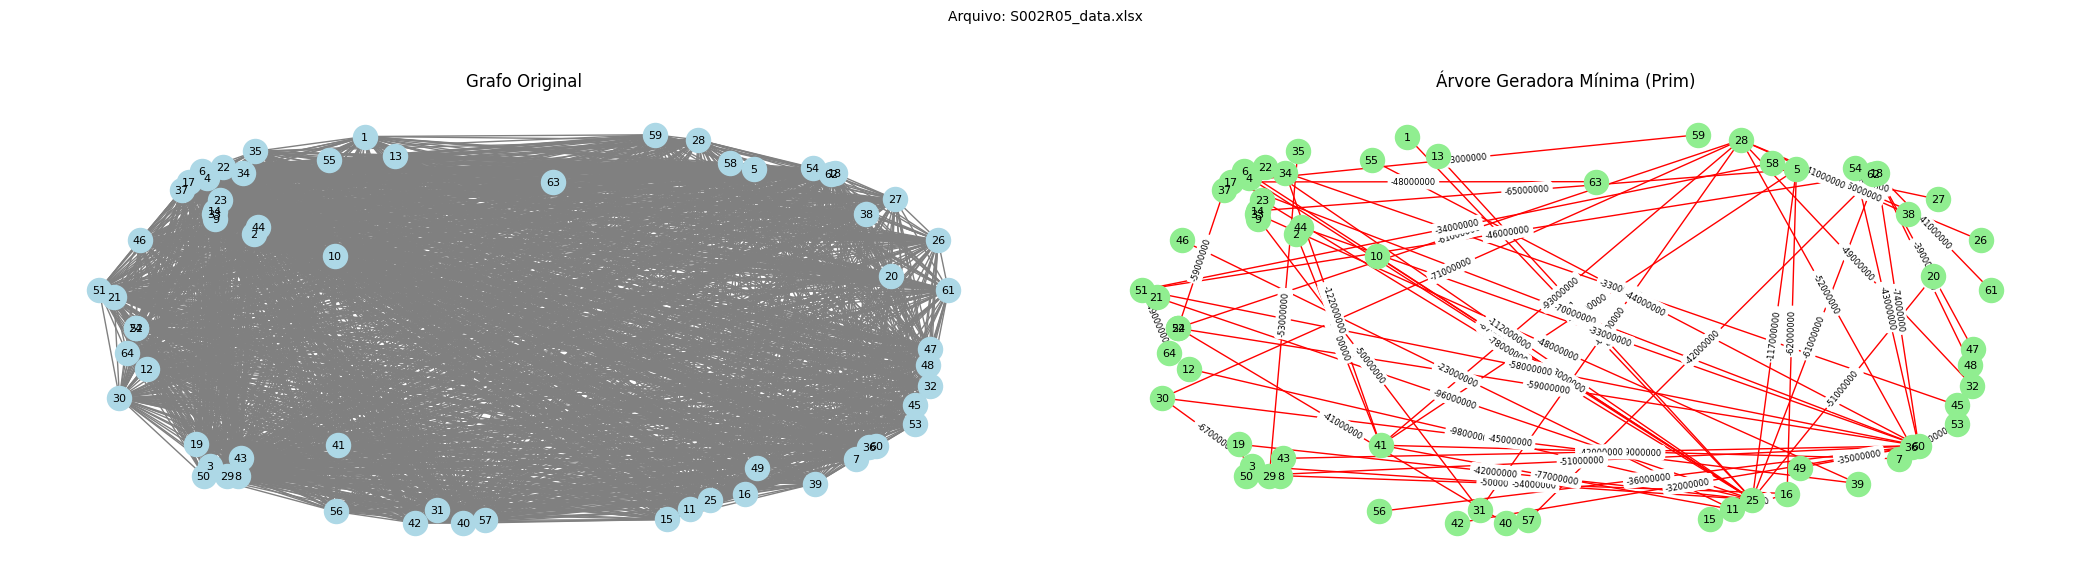


Processando: S002R06_data.xlsx
Custo total da Árvore Geradora Mínima: -4144000000.00


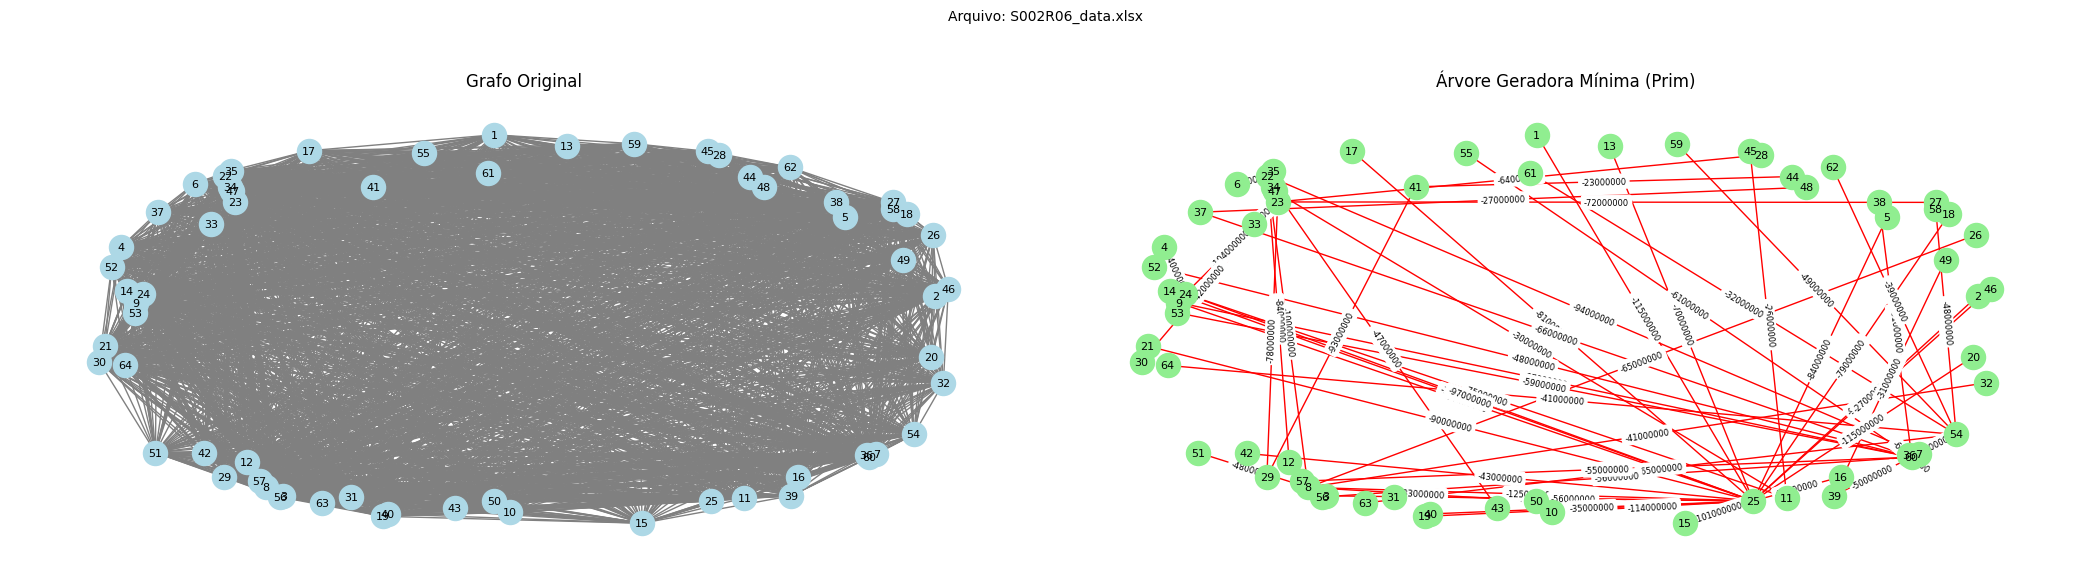

In [ ]:
# ==============================================================================
# CÉLULA 3: Execução Principal do Programa
# Este é o script que você executa para iniciar a análise.
# Ele usará as funções definidas na Célula 2.
# ==============================================================================

# IMPORTANTE: Altere o caminho abaixo para o local exato dos seus arquivos Excel.
caminho_pasta = '/content/drive/My Drive/Teoria dos Grafos/Entregas/Arquivos Excel'

# Utiliza o glob para listar todos os arquivos com a extensão .xlsx no caminho especificado.
arquivos_excel = glob.glob(os.path.join(caminho_pasta, '*.xlsx'))

# Loop principal para processar e visualizar cada arquivo encontrado
if not arquivos_excel:
    print(f"ATENÇÃO: Nenhum arquivo Excel foi encontrado no caminho especificado:\n'{caminho_pasta}'")
    print("Por favor, verifique se o caminho está correto e se os arquivos existem.")
else:
    print(f"Foram encontrados {len(arquivos_excel)} arquivos. Iniciando processamento...")
    for caminho_do_arquivo in arquivos_excel:
        try:
            nome_base_arquivo = os.path.basename(caminho_do_arquivo)
            print(f"\n--- Processando o arquivo: {nome_base_arquivo} ---")

            # 1. Ler os dados do arquivo
            df = pd.read_excel(caminho_do_arquivo)

            # 2. Processar os dados para obter o grafo e a MST
            G, mst, custo = processar_matriz_com_prim(df)

            print(f"Custo total da MST: {custo:.2f}")

            # 3. Visualizar os resultados
            visualizar_comparacao_mst(G, mst, nome_base_arquivo, custo)

        except Exception as e:
            print(f"Ocorreu um erro ao processar o arquivo {nome_base_arquivo}: {e}")

    print("\n--- Processamento de todos os arquivos concluído! ---")

Relatório Técnico: Implementação do Algoritmo de Prim para a Geração de Árvores Geradoras Mínimas
Autor: Leo Thirso
Disciplina: Teoria dos Grafos
Professor: Florencio Mendes Oliveira Filho

1. Introdução
Este relatório detalha o desenvolvimento de uma aplicação computacional para a determinação da Árvore Geradora Mínima (MST - Minimum Spanning Tree) em grafos ponderados e não direcionados. O projeto, realizado no âmbito da disciplina de Teoria dos Grafos, aplica o clássico algoritmo de Prim a um conjunto de grafos definidos por matrizes de adjacência. O objetivo central é não apenas calcular a MST e seu custo, mas também fornecer uma visualização clara que facilite a análise comparativa entre o grafo original e sua respectiva árvore mínima.

2. Metodologia e Ferramentas Utilizadas
A solução foi implementada na linguagem Python, aproveitando o poder de bibliotecas especializadas que abstraem tarefas complexas e permitem focar na lógica do problema.

2.1. Ferramentas de Software

Pandas: Utilizada para a leitura e manipulação eficiente dos dados de entrada, que foram fornecidos como matrizes de adjacência em arquivos no formato Excel (.xlsx).
NetworkX: Biblioteca fundamental para a modelagem, manipulação e estudo de grafos. Foi empregada para construir as estruturas de grafo a partir das matrizes e, crucialmente, para executar o algoritmo de Prim.
Matplotlib: Empregada para a renderização gráfica dos resultados, permitindo a criação de visualizações comparativas e informativas.
Glob e OS: Bibliotecas auxiliares utilizadas para a localização e gerenciamento automatizado dos arquivos de dados no sistema de arquivos.
2.2. Processamento e Modelagem do Grafo

O núcleo lógico do projeto reside na função processar_matriz_com_prim. Esta função é responsável por converter a representação tabular de um grafo (matriz) em uma estrutura de dados manipulável pelo NetworkX. As etapas são:

Limpeza e Preparação da Matriz: O DataFrame lido do arquivo Excel passa por um pré-processamento. A primeira coluna, geralmente um índice redundante, é removida. Os índices de linhas e colunas são então normalizados para valores inteiros, que servirão como identificadores únicos para os vértices (nós) do grafo.
Construção do Grafo: Um grafo não direcionado vazio é instanciado. O programa itera sobre a matriz de adjacência, adicionando uma aresta ponderada entre dois vértices sempre que um peso válido (não nulo) é encontrado. Para garantir a eficiência e evitar a duplicidade de arestas em um grafo não direcionado, a iteração considera apenas a triangular superior da matriz (onde índice da linha < índice da coluna).
2.3. Aplicação do Algoritmo de Prim

Com o grafo original (G) devidamente construído, a Árvore Geradora Mínima é calculada através da função networkx.minimum_spanning_tree(G, algorithm='prim'). Esta função encapsula toda a complexidade da implementação do algoritmo, retornando um novo objeto de grafo (mst) que contém apenas as arestas da árvore mínima. Subsequentemente, o custo total da MST é calculado pela soma dos pesos de todas as arestas contidas neste novo grafo.

3. Resultados e Análise Visual
Para apresentar os resultados de forma clara, um script principal orquestra a execução para todos os arquivos de dados encontrados. Para cada arquivo, a função de processamento é chamada, e os resultados (grafo original, MST e custo) são passados para uma função de visualização dedicada, a visualizar_comparacao_mst.

Esta função gera uma figura contendo dois subplots lado a lado:

Grafo Original (Esquerda): Exibe a topologia completa do grafo, com todos os seus vértices e arestas, oferecendo um panorama geral das conexões possíveis.
Árvore Geradora Mínima (Direita): Apresenta a MST, destacando suas arestas com uma cor distinta (vermelho) para fácil identificação. Os pesos de cada aresta da MST são exibidos, e o custo total da árvore é informado no título do subplot.
O layout dos nós é gerado de forma consistente para ambos os subplots por meio do algoritmo spring_layout, garantindo que a comparação visual seja direta e intuitiva. O título principal da figura identifica o arquivo de origem, assegurando a rastreabilidade da análise.

4. Conclusão
O objetivo proposto foi alcançado com sucesso. A aplicação desenvolvida é capaz de processar múltiplas matrizes de adjacência, calcular a Árvore Geradora Mínima e seu custo utilizando o algoritmo de Prim, e apresentar os resultados de maneira visualmente eficaz. A separação da lógica de processamento e de visualização em funções modulares resultou em um código limpo, legível e de fácil manutenção. O produto final não só resolve o problema computacional, mas também serve como uma valiosa ferramenta didática para a compreensão prática do funcionamento e do impacto do algoritmo de Prim na otimização de redes.